<a href="https://colab.research.google.com/github/KimaMurry/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

## Practice 1-Sample T-tests

One Sample t-tests determine whether or not a sample mean is statistically different from some known (or hypothesized) population mean. 

### 1) Load the Data
- Use the [automobile dataset](https://archive.ics.uci.edu/ml/datasets/Automobile)
- Fix the column headers
- Make sure NaNs are used to indicate missing values

Feel free to add code cells and text cells as needed throughout the assignment.

In [1]:
from google.colab import files
files.upload()


Saving imports-85.data to imports-85.data


{'imports-85.data': b'3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495\n3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500\n1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500\n2,164,audi,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950\n2,164,audi,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450\n2,?,audi,gas,std,two,sedan,fwd,front,99.80,177.30,66.30,53.10,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250\n1,158,audi,gas,std,four,sedan,fwd,front,105.80,192.70,71.40,55.70,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710\n1,?,audi,gas,std,four,wagon,fwd,front,105.80,192.70,71.40,55.70,2954,ohc,f

In [2]:
from google.colab import files
files.upload()

Saving imports-85.names to imports-85.names


{'imports-85.names': b'1. Title: 1985 Auto Imports Database\n\n2. Source Information:\n   -- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)\n   -- Date: 19 May 1987\n   -- Sources:\n     1) 1985 Model Import Car and Truck Specifications, 1985 Ward\'s\n        Automotive Yearbook.\n     2) Personal Auto Manuals, Insurance Services Office, 160 Water\n        Street, New York, NY 10038 \n     3) Insurance Collision Report, Insurance Institute for Highway\n        Safety, Watergate 600, Washington, DC 20037\n\n3. Past Usage:\n   -- Kibler,~D., Aha,~D.~W., \\& Albert,~M. (1989).  Instance-based prediction\n      of real-valued attributes.  {\\it Computational Intelligence}, {\\it 5},\n      51--57.\n\t -- Predicted price of car using all numeric and Boolean attributes\n\t -- Method: an instance-based learning (IBL) algorithm derived from a\n\t    localized k-nearest neighbor algorithm.  Compared with a\n\t    linear regression prediction...so all instances\n\t    wi

In [17]:
### YOUR WORK HERE
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind

df = pd.read_csv('imports-85.data')
print(df.shape)
df.head()

(204, 26)


,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [44]:
column_header = ['symboling', 'normalized-losses', 'make', 'fuel-type', 
                 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
                 'engine-location', 'wheel-base', 'length', 'width', 'height', 
                 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size'
                 , 'fuel-system', 'bore', 'stoke', 'compression-ratio', 
                 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'] 
cars = pd.read_csv('imports-85.data', header=None, names=column_header, na_values='?')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stoke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### 2) Pretend that this dataset represents the cars at a used car lot in your local town. 

- Use df.sample() to pick a random sample of 10 cars. Note that because this sample is random we are going to set the `random_state` so that all of us in the class get the same random sample. Please set your random state to `30` when using `df.sample()`

Is your sample reflective of the population value in regards to highway-mpg? Find the mean for `highway-mpg` for the entire dataset and use a 1-sample t-test to compare your estaimated sample mean to the population mean. Can you say that they are different? 

In [47]:
### YOUR WORK HERE
sam = cars.sample(n=10, random_state=30)
sam

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stoke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
121,1,154.0,plymouth,gas,std,four,sedan,fwd,front,93.7,167.3,63.8,50.8,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0
176,-1,65.0,toyota,gas,std,four,sedan,fwd,front,102.4,175.6,66.5,54.9,2414,ohc,four,122,mpfi,3.31,3.54,8.7,92.0,4200.0,27,32,10898.0
24,1,148.0,dodge,gas,std,four,hatchback,fwd,front,93.7,157.3,63.8,50.6,1967,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6229.0
88,-1,137.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2403,ohc,four,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9279.0
72,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
103,0,108.0,nissan,gas,std,four,sedan,fwd,front,100.4,184.6,66.5,55.1,3060,ohcv,six,181,mpfi,3.43,3.27,9.0,152.0,5200.0,19,25,13499.0
26,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0
20,0,81.0,chevrolet,gas,std,four,sedan,fwd,front,94.5,158.8,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,6575.0
155,0,91.0,toyota,gas,std,four,wagon,4wd,front,95.7,169.7,63.6,59.1,3110,ohc,four,92,2bbl,3.05,3.03,9.0,62.0,4800.0,27,32,8778.0
185,2,94.0,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2212,ohc,four,109,mpfi,3.19,3.40,9.0,85.0,5250.0,27,34,8195.0


In [48]:
print(sam['highway-mpg'].mean())
print(df['highway-mpg'].mean())

32.8
30.75121951219512


In [61]:
ttest_ind(sam['highway-mpg'], df['highway-mpg']).pvalue

0.3604640293545831

The salesman says the cars he sells typically have a fuel efficiency of about 35 miles per gallon on the highway. You want to verify his claim but can only test 10 cars. Using your sample of 10, test his claim and report your results.

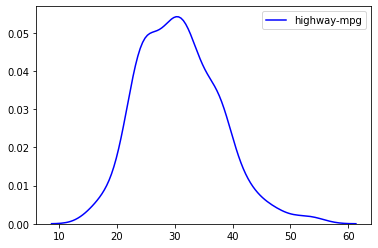

In [53]:
### YOUR WORK HERE
sns.kdeplot(cars['highway-mpg'], color='blue')

Imagine that you now have the capacity to test 100 cars on the lot. Using the same random state of `30`, take a sample of 100 cars. Run a t-test to verify the salesman's claim with your new larger sample. Do you reach the same conclusion as you did with the sample size of 10? 

In [56]:
### YOUR WORK HERE
sam2 = cars.sample(n=100, random_state=30)
sam2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stoke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
121,1,154.0,plymouth,gas,std,four,sedan,fwd,front,93.7,167.3,63.8,50.8,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0
176,-1,65.0,toyota,gas,std,four,sedan,fwd,front,102.4,175.6,66.5,54.9,2414,ohc,four,122,mpfi,3.31,3.54,8.7,92.0,4200.0,27,32,10898.0
24,1,148.0,dodge,gas,std,four,hatchback,fwd,front,93.7,157.3,63.8,50.6,1967,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6229.0
88,-1,137.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2403,ohc,four,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9279.0
72,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,3,NaN,volkswagen,gas,std,two,convertible,fwd,front,94.5,159.3,64.2,55.6,2254,ohc,four,109,mpfi,3.19,3.40,8.5,90.0,5500.0,24,29,11595.0
192,0,NaN,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,180.2,66.9,55.1,2579,ohc,four,97,idi,3.01,3.40,23.0,68.0,4500.0,33,38,13845.0
171,2,134.0,toyota,gas,std,two,hatchback,rwd,front,98.4,176.2,65.6,52.0,2714,ohc,four,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,11549.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [57]:
print(sam2['highway-mpg'].mean())
print(df['highway-mpg'].mean())

30.64
30.75121951219512


In [60]:
ttest_ind(sam2['highway-mpg'], df['highway-mpg']).pvalue

0.8937682684701802

Why might these two t-tests using the same dataset lead to different conclusions about the salesman's claim?

The bigger your sample is the more percise your results will be.


## Practice 2-Sample T-tests

Two Sample t-tests determine whether or not two sample means are statistically different from each other. 

This portion of your assignment requires you to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). 


### 1) Load the data

The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

- Read the dataset in from UCI, you'll need to provide a list of column headers
- Encode "yes" votes as 1 and "no" votes as 0. (You can use `df.replace()` to swap out these values)
- Use dataframe filtering to split the dataframe into two new dataframes based on party. Hold all republicans in one dataframe and all democrats in the other. These will be our two different "samples."



In [62]:
### YOUR WORK HERE
from google.colab import files
files.upload()

Saving house-votes-84.data to house-votes-84.data


{'house-votes-84.data': b'republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y\nrepublican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?\ndemocrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n\ndemocrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y\ndemocrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y\ndemocrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y\ndemocrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y\nrepublican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y\nrepublican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y\ndemocrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?\nrepublican,n,y,n,y,y,n,n,n,n,n,?,?,y,y,n,n\nrepublican,n,y,n,y,y,y,n,n,n,n,y,?,y,y,?,?\ndemocrat,n,y,y,n,n,n,y,y,y,n,n,n,y,n,?,?\ndemocrat,y,y,y,n,n,y,y,y,?,y,y,?,n,n,y,?\nrepublican,n,y,n,y,y,y,n,n,n,n,n,y,?,?,n,?\nrepublican,n,y,n,y,y,y,n,n,n,y,n,y,y,?,n,?\ndemocrat,y,n,y,n,n,y,n,y,?,y,y,y,?,n,n,y\ndemocrat,y,?,y,n,n,n,y,y,y,n,n,n,y,n,y,y\nrepublican,n,y,n,y,y,y,n,n,n,n,n,?,y,y,n,n\ndemocrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y\ndemocrat,y,y,y,n,n,?,y,y,n,n,y,n,n,n,y,y\ndemocrat,y,y,y,n,n,n,y,y,y,n,n,n,?,?,y,y\ndemocrat,y,?,y,n,n,n,y,y,y,n,n,?

In [63]:
from google.colab import files
files.upload()

Saving house-votes-84.names to house-votes-84.names


{'house-votes-84.names': b'1. Title: 1984 United States Congressional Voting Records Database\n\n2. Source Information:\n    (a) Source:  Congressional Quarterly Almanac, 98th Congress, \n                 2nd session 1984, Volume XL: Congressional Quarterly Inc. \n                 Washington, D.C., 1985.\n    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)\n    (c) Date: 27 April 1987 \n\n3. Past Usage\n   - Publications\n     1. Schlimmer, J. C. (1987).  Concept acquisition through \n        representational adjustment.  Doctoral dissertation, Department of \n        Information and Computer Science, University of California, Irvine, CA.\n        -- Results: about 90%-95% accuracy appears to be STAGGER\'s asymptote\n     - Predicted attribute: party affiliation (2 classes)\n\n4. Relevant Information:\n      This data set includes votes for each of the U.S. House of\n      Representatives Congressmen on the 16 key votes identified by the\n      CQA.  The CQA lists nine di

In [77]:
column_head = ['party', 'handicapped-infants', 'water-project-cost-sharing', 
               'adoption-of-the-budget-resolution', 'physican-fee-freeze', 
               'el-salvador-aid', 'religous-groups-in-schools', 'anti-satellite-test-ban', 
               'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 
               'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 
               'crime', 'duty-free-exports', 'export-administration-act-south-africa']

votes = pd.read_csv('house-votes-84.data', header=None, names=column_head, na_values='?')
votes.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physican-fee-freeze,el-salvador-aid,religous-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [78]:
votes = votes.replace({'y':1, 'n':0})
votes.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physican-fee-freeze,el-salvador-aid,religous-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [79]:
votes['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [80]:
rep = votes[votes['party']=='republican']
rep.shape

(168, 17)

In [83]:
dem = votes[votes['party']=='democrat']
dem.shape

(267, 17)

### 2) Perform two sample T-tests on different issues and report the results.

- Find an issue that democrats support more than republicans with p < 0.01 (significant at the 99% level).
- Find an issue that republicans support more than democrats with p < 0.01 (significant at the 99% level).
- Find an issue where the difference between republicans and democrats has p > 0.1 (Not significant at the 90% level - i.e. there may not be much of a difference the two sample means)

Please for each test that you run state your null and alternative hypothesis and then write a conclusion reflecting on the null and alternative hypothesis.

Remember, that two-sample t-tests will only tell us if the two groups are *different* from one another. We'll have to look at their sample means directly or use the sign on the t-statistic to know which of the two sample means is larger. 

In [ ]:
### YOUR WORK HERE

## Stretch Goals:

### 1) Use functions and some iterator (for loop, .apply(), list comprehension, etc.) to perform two sample t-tests on every issue in the dataset in an automated fashion.

In [ ]:
### YOUR WORK HERE



### 2) Work on Performing a T-test without using Scipy in order to get "under the hood" and learn more thoroughly about this topic.
### Start with a 1-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://blog.minitab.com/hs-fs/hubfs/Imported_Blog_Media/701f9c0efa98a38fb397f3c3ec459b66.png?width=247&height=172&name=701f9c0efa98a38fb397f3c3ec459b66.png) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

### Be sure to check your work using Scipy!





In [ ]:
### YOUR WORK HERE

### 3) Then try a 2-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://lh3.googleusercontent.com/proxy/rJJ5ZOL9ZDvKOOeBihXoZDgfk7uv1YsRzSQ1Tc10RX-r2HrRpRLVqlE9CWX23csYQXcTniFwlBg3H-qR8MKJPBGnjwndqlhDX3JxoDE5Yg) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Be sure to check your work using Scipy!

In [ ]:
### YOUR WORK HERE